In [ ]:
# Montar sistema de archivos
from google.colab import drive
drive.mount('/content/drive')
%load_ext autoreload
%autoreload 2

Mounted at /content/drive


In [ ]:
# Movernos a la carpeta
import os
#os.chdir("drive/My Drive/Colab Notebooks/Colab Notebooks/IOT/Practica 11/")
!ls

Detección_Objetos.ipynb  img


In [ ]:
# Instalar API de TensorFlow
#!git clone https://github.com/pjreddie/darknet.git
#os.chdir("darknet")
!make
!nvcc --version
!nvidia-smi
os.getcwd()

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Is

'/content/drive/My Drive/Colab Notebooks/IOT/Practica 11/darknet'

In [ ]:
# Descargar pesos de la red neuronal
os.chdir('..')
!wget https://pjreddie.com/media/files/yolov3.weights
!ls
os.chdir('darknet')

--2021-06-01 15:54:00--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  36.8MB/s    in 7.5s    

2021-06-01 15:54:08 (31.7 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]

darknet  Detección_Objetos.ipynb  img  yolov3.weights  yolov3.weights.1


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

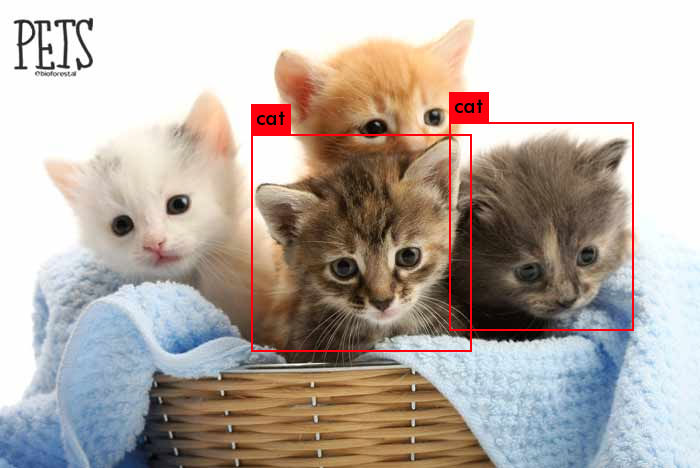

In [ ]:
# Ejecuion del Codigo
!./darknet  detect cfg/yolov3.cfg ../yolov3.weights ../img/gatitos.jpg
from IPython.display import Image
Image(filename='predictions.jpg')

In [ ]:
# Si se abrio el archivo ejecutar desde aqui
import os
#from google.colab import drive
#drive.mount('/content/drive')
#%load_ext autoreload
#%autoreload 2
os.chdir("drive/My Drive/Colab Notebooks/IOT/Practica 11/darknet")
!ls
os.getcwd()

backup	  examples	 LICENSE.fuck  LICENSE.v1	python
bad.list  include	 LICENSE.gen   Makefile		README.md
cfg	  libdarknet.a	 LICENSE.gpl   obj		results
darknet   libdarknet.so  LICENSE.meta  photo.jpg	scripts
data	  LICENSE	 LICENSE.mit   predictions.jpg	src


'/content/drive/My Drive/Colab Notebooks/IOT/Practica 11/darknet'

In [ ]:
# Tomar Fotos
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


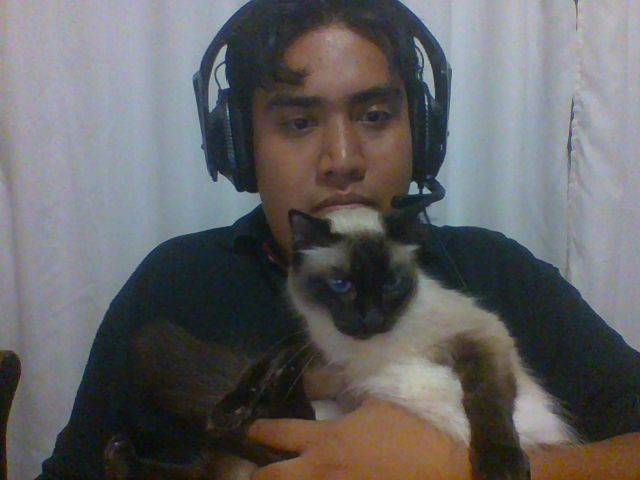

In [107]:
# Activar camara y tomar foto
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  print(str(err))

In [108]:
# Objetos detectados
!./darknet  detect cfg/yolov3.cfg ../yolov3.weights photo.jpg
#!chmod 755 -R .

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

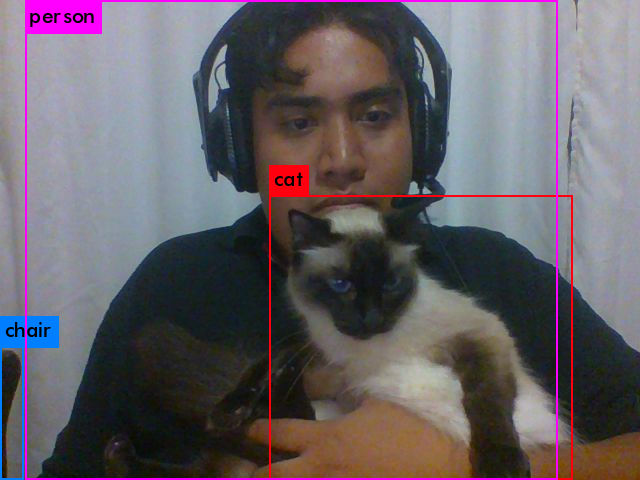

In [109]:
from IPython.display import Image
Image(filename='predictions.jpg')